In [56]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


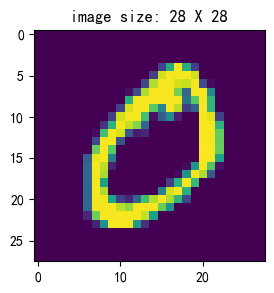

In [57]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt

img1 = X_train[1]

fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('image size: 28 X 28')
plt.show()

In [58]:
print("Shape", img1.shape)
print(img1)

Shape (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163

In [59]:
# format the input data
feature_size = img1.shape[0] * img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)

print(X_train.shape)
print(X_train_format.shape)

(60000, 28, 28)
(60000, 784)


In [60]:
# normalize the input data
X_train_normal = X_train_format / 255
X_test_normal = X_test_format / 255
print(X_train_normal.shape)
print(X_train_normal[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [61]:
# Convert category labels (usually integers) to one-hot encoding format.
from tensorflow.keras.utils import to_categorical

y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)


In [62]:
# 独热编码（one-hot encoded）的形式
print(y_train_format[0])
print(y_train_format[10])
print(y_train_format[200])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
print(X_train_normal.shape,y_train_format.shape)

(60000, 784) (60000, 10)


In [64]:
# set up the mlp model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=392, activation="relu", input_dim=784))
mlp.add(Dense(units=392, activation="relu"))
mlp.add(Dense(units=10, activation="softmax"))
mlp.summary()

c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,706 (1.78 MB)

 Trainable params: 465,706 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# configure the model
# 配置一个多层感知器模型，准备进行多分类问题的训练
# 使用交叉熵损失函数、Adam 优化器
# 将分类准确率作为训练和验证过程中的评估指标
mlp.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

In [66]:
# train the model
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9021 - loss: 0.3223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9738 - loss: 0.0829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9833 - loss: 0.0543
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9874 - loss: 0.0389
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9896 - loss: 0.0319
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9917 - loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9927 - loss: 0.0209
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9932 - loss: 0.0195
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9940 - loss: 0.0192
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9958 - loss: 0.0135

In [67]:
import numpy as np

# evaluate the model

# https://discuss.ai.google.dev/t/sequential-object-has-no-attribute-predict-classes/19265/5
# Multi-class Classification: predictions = np.argmax(model.predict(x_test), axis=-1)
y_train_predict = np.argmax(mlp.predict(X_train_normal), axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [68]:
print(type(y_train_predict), y_train_predict.shape)
print(type(y_train_predict), y_train_predict.shape)

print(y_train_predict[0:10])

<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (60000,)
[5 0 4 1 9 2 1 3 1 4]


In [69]:
print(y_train_predict[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [70]:
# https://discuss.ai.google.dev/t/sequential-object-has-no-attribute-predict-classes/19265/5
# Multi-class Classification: predictions = np.argmax(model.predict(x_test), axis=-1)
y_test_predict = np.argmax(mlp.predict(X_test_normal), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
print(type(y_test_predict), y_test_predict.shape)
print(type(y_test_predict), y_test_predict.shape)

print(y_test_predict[0:10])

<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
[7 2 1 0 4 1 4 9 5 9]


In [72]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_test_predict)
print("accuracy score: ", accuracy_test)

accuracy score:  0.9795


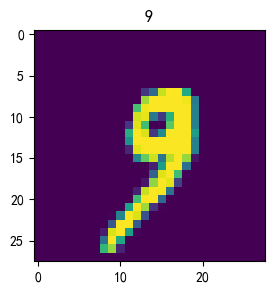

In [73]:
img2 = X_test[1000]
fig2 = plt.figure(figsize=(3, 3))
plt.imshow(img2)
plt.title(y_test_predict[1000])
plt.show()

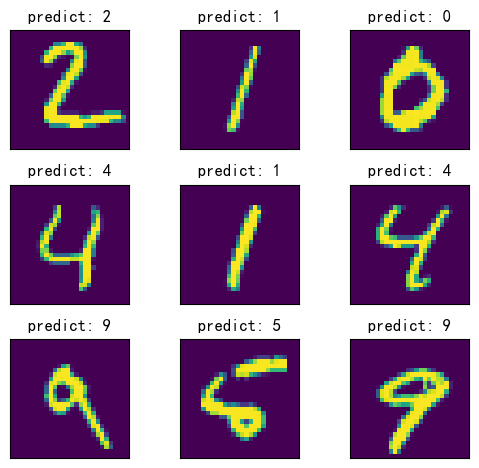

In [74]:
count = [i for i in range(1, 10)]
fig4 = plt.figure(figsize=(5, 5))
for i in count:
    plt.subplot(3, 3, i)
    plt.tight_layout()
    plt.imshow(X_test[i])
    plt.title("predict: {}".format(y_test_predict[i]))
    plt.xticks([])
    plt.yticks([])

plt.show()